# 1. Load the .py file using %load "cwd\\check_fabian.py (Check Predictions).py"
** CWD is your current working directory, specify the full path

# 2. Import neccesities and load model
There are two types of models:

Linear - mypilot91.h5

Categorical - mypilot98.h5 & SavedModel.hdf5
# 3. Create 3 lists, we will append filename, angle & throttle to them respectively
# 4. Specify number of files in range, e.g 1 to 3000
# 5. Specify the full path for 'filename' and 'filename1' 
# The models should follow the tub they were trained on:
mypilot91 (Linear) & SavedModel1 (Categorical) - tub_280_20-02-01

mypilot98 (Categorical) - pilottub98

You can increase the number of files to display, range(start,stop) depending on the tub & amount of data it has



# 6. **IMPORTANT**
# **If using linear model, comment away the Categorical code, vice versa if using categorical model


# 7. Run the code

[-1.0, -1.0, -1.0, -1.0, -1.0]


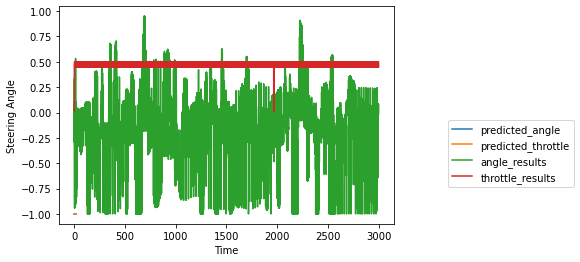

'\n# Test Example\nimg = image.imread(\'C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\1_cam-image_array_.jpg\')\nprint(img.shape)\nplt.imshow(img)\nplt.show()\nimg_test = img.reshape(-1,120, 160, 3)\nprediction = model.predict(img_test)\nprint(prediction, "\n")\n\nj=0\nimport glob\nimage_list = []\nfor filename in glob.glob(\'./data/j*.jpg\'):\n    im=image.imread(filename)\n    print(filename)\n    image_list.append(im)\nprint(j)\n'

In [1]:
# %load "C:\\Users\\kansh\\projects\\mycar\\check_fabian.py (Check Predictions).py"

from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy 
import numpy as np
import json
from matplotlib import image
import matplotlib.pyplot as plt

# Load the trained model 
#model = load_model('C:\\Users\\kansh\\projects\\mycar\\models\\mypilot91.h5', compile = False) #linear pilot91
#model = load_model('C:\\Users\\kansh\\projects\\mycar\\models\\mypilot98.h5', compile = False) #categorical pilot98 NO early stop
#model = load_model('C:\\Users\\kansh\\Desktop\\FYP\\SavedModel1.hdf5', compile = False)  #categorical Own
model = load_model('C:\\Users\\kansh\\Desktop\\FYP\\SavedModel5.hdf5', compile = False)  #categorical Own

image_list=[]
angle_results=[]
throttle_results=[]
for i in range(1,3000):  # Number of files to display  
    j=str(i)
    
    #filename='C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\'+j+'_cam-image_array_.jpg' #linear + own
    filename='C:\\Users\\kansh\\projects\\mycar\\data\\pilottub98\\'+j+'_cam-image_array_.jpg'    #categorical
    #print(filename)
    
    im=image.imread(filename)
    image_list.append(im)
    
    #filename1='C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\record_'+j+'.json' #linear + own
    filename1='C:\\Users\\kansh\\projects\\mycar\\data\\pilottub98\\record_'+j+'.json'    #categorical

    with open(filename1, 'r') as f:
        data = json.load(f)
        x = data['user/angle']
        y = data['user/throttle']
        angle_results.append(data['user/angle'])
        throttle_results.append(data['user/throttle'])

# Get predictions 
#print(type(image_list))
image_array=numpy.array(image_list)
prediction = model.predict(image_array)

############################################################################################
"""
# **Use for linear**
#print(type(prediction))
print(prediction)         # There are two columns for angle and throttle
predicted_angle = prediction[0]
predicted_throttle = prediction[1]
# **Use for linear**
"""
############################################################################################

# **Use for categorical**
# Function from utils.py (projects/donkeycar/donkeycar/utils.py (Binned & Unbinned))
def linear_unbin(arr, N=15, offset=-1, R=2.0):   # preform inverse linear_bin,
    b = np.argmax(arr)                           # taking one hot encoded arr, get max value
    a = b *(R/(N + offset)) + offset             # rescale given R range and offset
    return a

# Create empty list to get
# for x amount in prediction[0], append to (function to reverse 1 hot encode) to angles, put in list
predicted_angle = []
predicted_throttle = []
for i in prediction[0]: 
    predicted_angle.append(linear_unbin(i))
for i in prediction[1]:
    predicted_throttle.append(linear_unbin(i))
# **Use for categorical**

############################################################################################

# See predictions in angle instead of 1 hot encoding
print(predicted_angle[10:20])

# Plot graph of prediction, angle & throttle value
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(predicted_angle,    label='predicted_angle') 
plt.plot(predicted_throttle, label='predicted_throttle') 
plt.plot(angle_results,      label='angle_results')
plt.plot(throttle_results,   label='throttle_results')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 0.5))
plt.show()

"""
# Test Example
img = image.imread('C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\1_cam-image_array_.jpg')
print(img.shape)
plt.imshow(img)
plt.show()
img_test = img.reshape(-1,120, 160, 3)
prediction = model.predict(img_test)
print(prediction, "\n")

j=0
import glob
image_list = []
for filename in glob.glob('./data/j*.jpg'):
    im=image.imread(filename)
    print(filename)
    image_list.append(im)
print(j)
"""

In [2]:
#print(image_list[0:10])
print(im)

[[[ 50  50  42]
  [ 50  50  42]
  [ 52  52  44]
  ...
  [146 148 134]
  [149 151 137]
  [154 156 142]]

 [[ 55  55  45]
  [ 53  53  43]
  [ 52  52  42]
  ...
  [147 149 135]
  [150 152 138]
  [156 158 144]]

 [[ 57  57  47]
  [ 53  53  43]
  [ 50  50  40]
  ...
  [150 151 137]
  [151 153 139]
  [157 159 145]]

 ...

 [[126 122 119]
  [128 124 121]
  [134 130 127]
  ...
  [ 99  95  92]
  [103  99  96]
  [109 105 102]]

 [[127 123 120]
  [128 124 121]
  [134 130 127]
  ...
  [ 99  95  92]
  [102  98  95]
  [108 104 101]]

 [[125 121 118]
  [124 120 117]
  [128 124 121]
  ...
  [ 99  95  92]
  [102  98  95]
  [108 104 101]]]


# 8. Now that you have all plots together above, run the code below

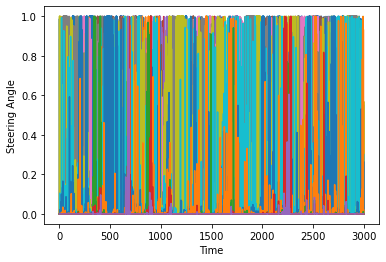

[[9.83427286e-01 1.64725743e-02 7.39986644e-05 5.07642108e-06
  1.88618942e-05 1.18478329e-06 1.01704313e-06 1.51459145e-09
  8.71258088e-09 1.71836714e-08 1.73742283e-08 1.74970726e-12
  6.23492577e-11 1.13525095e-13 1.37567373e-15]
 [1.37470930e-34 9.81855754e-38 9.91418850e-24 5.96115624e-26
  7.24105588e-21 4.47864436e-15 5.35927964e-13 1.07214848e-09
  9.99999404e-01 5.03454487e-07 1.07005349e-07 5.69854502e-15
  5.18624948e-30 3.79877759e-35 0.00000000e+00]
 [9.86841559e-01 1.20371561e-02 1.08588650e-03 2.14740635e-06
  1.60286454e-05 9.83942755e-06 7.13295140e-06 3.30992078e-09
  4.18198542e-09 9.04691362e-08 8.41045136e-08 1.78517132e-11
  8.68481606e-11 9.23015445e-15 4.57906170e-16]
 [6.79076265e-07 6.44947136e-07 3.80616075e-05 8.54314749e-06
  6.39533100e-04 1.00559546e-02 9.83114839e-01 2.44373223e-03
  2.55858270e-03 1.88652295e-04 9.50316025e-04 3.08201436e-07
  6.22234042e-10 2.73460013e-14 1.34904241e-13]
 [2.29525781e-07 2.22641106e-08 1.62777869e-05 1.58674011e-05
  

In [3]:
"""
# Keras Categorical
# Directly plotting prediction[0] gives us 0 (angle) and 1 (throttle)
plt.plot(prediction[0]) # Since it only predict 0.0 and 1.0, it's in binary.
plt.show()
# Since we are using categorical, there must be 1 hot encoding
print(prediction[0][2:10])
"""

#################################################################################
# Own Model Categorical
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(prediction) # Since it only predict 0.0 and 1.0, it's in binary.
plt.show()
# Since we are using categorical, there must be 1 hot encoding
print(prediction[0:10])


# 9. These lines of colours on the graph and numpy array 0's and 1's are in 1 Hot Encoding format (Commonly used for categorical data)
The predictions for every category of steering angle are 1 Hot Encoded

When we plot the prediction[0] for predicted angles, it is hardly understood. However, if we print out prediction[0], we can understand better. 

One hot encoding is when a label is assigned to a 2D numpy array of 0s and 1s

For example, I have 3 classes, cat, dog and car I can one hot encode them like this:

Cat = [1,0,0]

Dog = [1,0,1]

Car = [1,1,1]

# 10. Since the angles are categorised into categories and 1 hot encoded, we need to decode the 1-hot encoding, thus we use the "def linear_unbin()" function

If you "print(b)" inside the function, you will see a long column of numbers from 0 to 14 which are the categories.

# 11. With the for loops after the function, we create new lists and append our prediction[0] and [1] into the list respectively to decode the data
# 12. Now when we print the predicted_angle, we can see an array of angle values

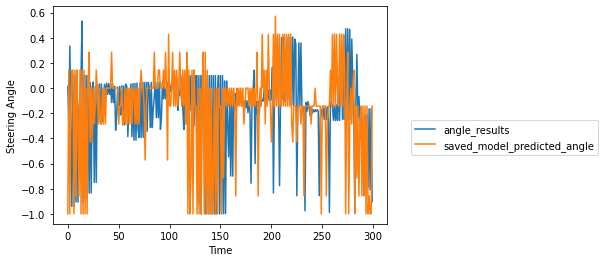

In [17]:
#"""
# Code only for Own Model Categorical 

saved_model_predicted_angle = []
for i in prediction: 
    saved_model_predicted_angle.append(linear_unbin(i))

plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(angle_results[0:300],               label='angle_results')
plt.plot(saved_model_predicted_angle[0:300], label='saved_model_predicted_angle')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 0.5))
plt.show()
#"""

# 13. We can plot the angle and predicted angle to see if the prediction matches the actual angle

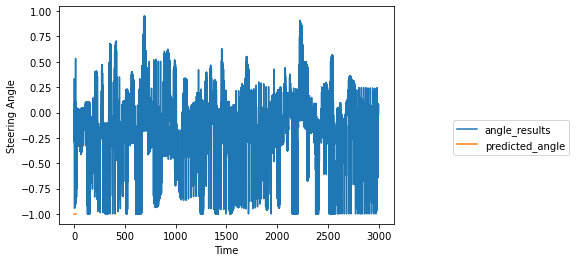

In [6]:
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(angle_results, label='angle_results')
plt.plot(predicted_angle, label='predicted_angle')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 0.5))
plt.show()

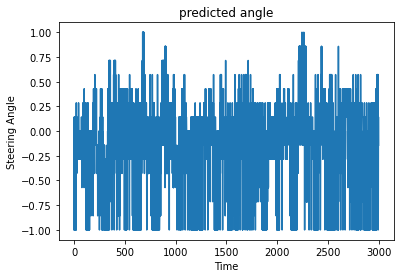

In [12]:
plt.title("predicted angle")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(predicted_angle)
plt.show()

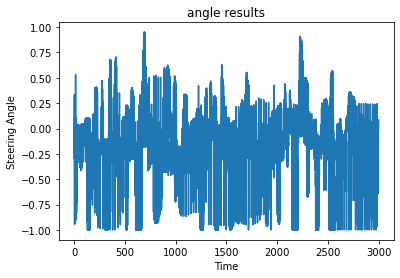

In [8]:
plt.title("angle results")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(angle_results)
plt.show()

# 14. We can also plot the throttle and predicted throttle to see if the prediction matches the actual throttle

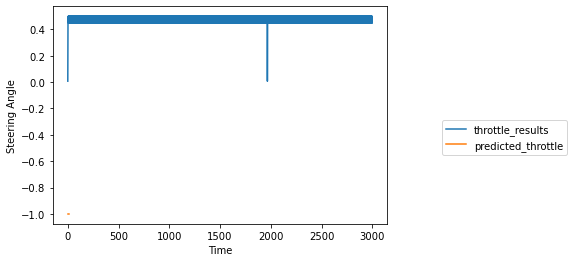

In [9]:
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(throttle_results, label='throttle_results')
plt.plot(predicted_throttle, label='predicted_throttle')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 0.5))
plt.show()

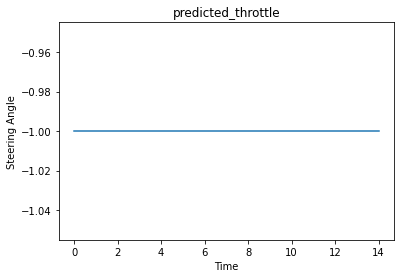

In [10]:
plt.title("predicted_throttle")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(predicted_throttle, label='predicted_throttle')
plt.show()

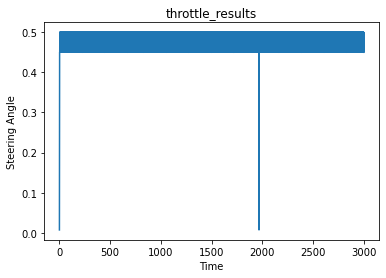

In [11]:
plt.title("throttle_results")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(throttle_results, label='throttle_results')
plt.show()